In [2]:
import matplotlib.pyplot as plt
from result_utils import read_all_csvs
import matplotlib.ticker as mtick
import numpy as np

mc_sep3/


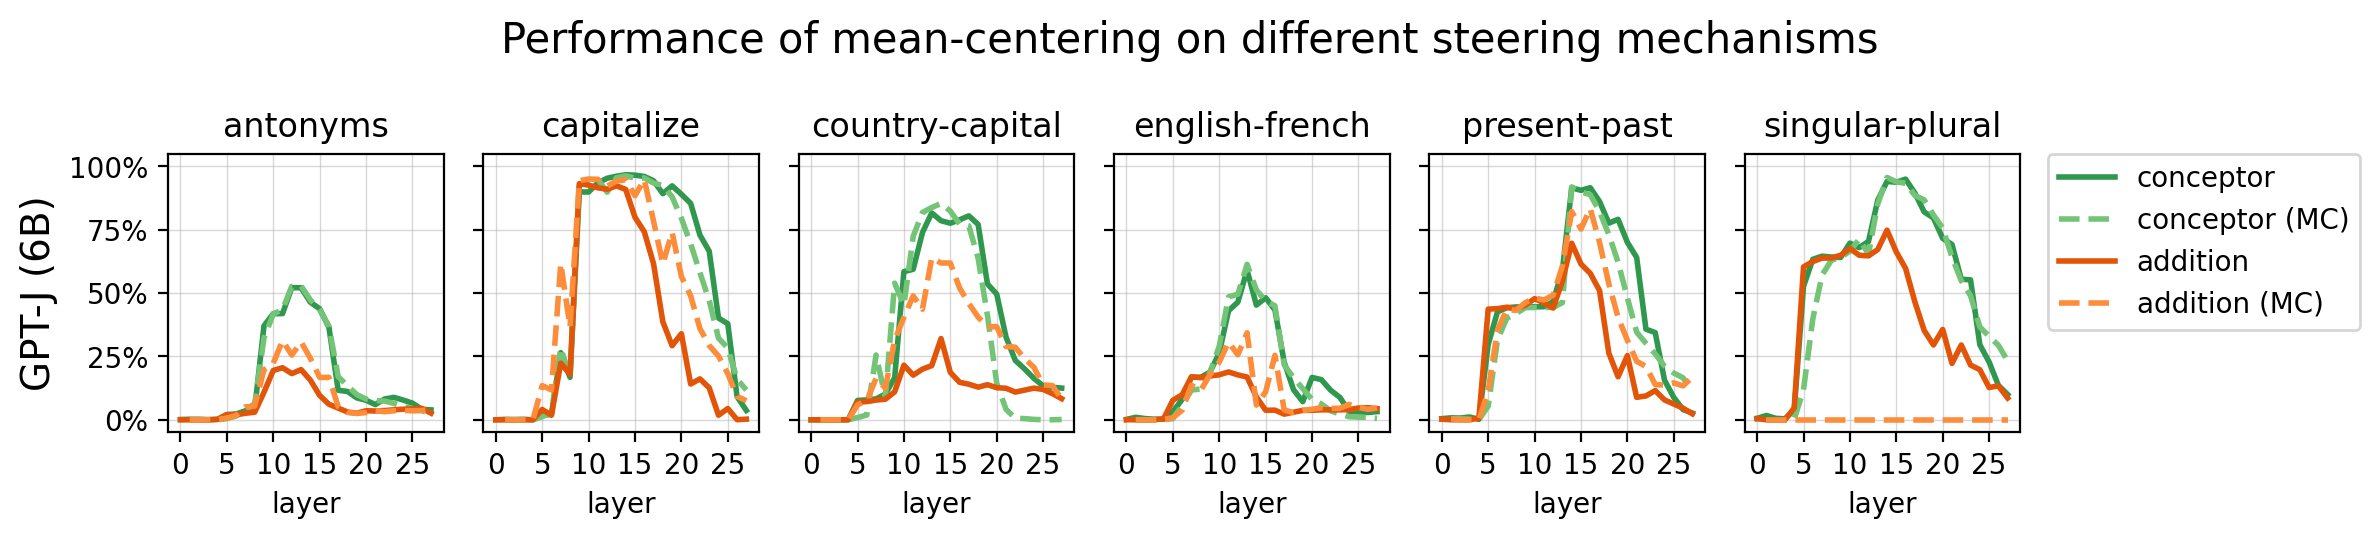

In [14]:
def plot_best_accuracy_per_layer(model_ids: list[str], mc_folder="", figsizescale=1.0, include_baseline=True):
    tasks = ["antonyms", "capitalize", "country-capital", "english-french", "present-past", "singular-plural"]
    fig, axss = plt.subplots(len(model_ids), 6, figsize=(12, 0.5+figsizescale*2*len(model_ids)), dpi=200, sharex='row', sharey=True)
    colors = plt.cm.tab10([0, 1, 2])
    colors = [
        # "C2",
        # "C2",
        plt.cm.Greens(0.7),
        plt.cm.Greens(0.5),
        # "C1",
        # "C1",
        plt.cm.Oranges(0.7),
        plt.cm.Oranges(0.5),
    ]
    print(mc_folder)
    fig.suptitle("Performance of mean-centering on different steering mechanisms", fontsize=15)
    for model_idx, model_id in enumerate(model_ids):
        axs = axss if len(model_ids) == 1 else axss[model_idx]
        for task_idx, task in enumerate(tasks):
            # ax = axs[task_idx // 3][task_idx % 3]
            ax = axs[task_idx]
            # load and plot conceptor results
            df = read_all_csvs(f"../results/{model_id}_{task}_conceptor")
            df = df[df.experiment == "Average"]
            df_max = df.groupby('layer').max().reset_index()
            ax.plot(df_max.layer, df_max.final_accuracy, label='conceptor', lw=2, ls="-", color=colors[0])
            try:
                # load and plot conceptor results
                df = read_all_csvs(f"../results/{mc_folder}{model_id}_{task}_conceptor_mc")
                df = df[df.experiment == "Average"]
                df_max = df.groupby('layer').max().reset_index()
                ax.plot(df_max.layer, df_max.final_accuracy, label='conceptor (MC)', lw=2, ls="--", color=colors[1])
            except Exception as e:
                print(task, "conceptor", e)
                pass
            # load and plot addition results
            df = read_all_csvs(f"../results/{model_id}_{task}_addition")
            df = df[df.experiment == "Average"]
            df_max = df.groupby('layer').max().reset_index()
            ax.set_title(task)
            ax.plot(df_max.layer, df_max.final_accuracy, label='addition', lw=2, ls="-", color=colors[2])
            # load and plot addition mean centered results
            try:
                df = read_all_csvs(f"../results/{mc_folder}{model_id}_{task}_addition_mc")
                df = df[df.experiment == "Average"]
                df_max = df.groupby('layer').max().reset_index()
                ax.set_title(task)
                ax.plot(df_max.layer, df_max.final_accuracy, label='addition (MC)', lw=2, ls="--", color=colors[3])
            except Exception as e:
                print(task, "addition", e)
                pass
            # plot baseline results
            if include_baseline:
                ax.plot(df_max.layer, [0] * len(df_max.layer), label='baseline', lw=2, ls='--', color='red')
            if task_idx == 5:
                # put legend to the right outside of the plot
                ax.legend(bbox_to_anchor=(1.05, 1.05), loc='upper left')
            if task_idx == 0:
                model_dict = {"gpt-j-6B": "GPT-J (6B)", "gpt-neox-20b": "GPT-NeoX (20B)"}
                ax.set_ylabel(model_dict.get(model_id, model_id), fontsize=14)
            ax.set_xlabel('layer')
            ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
            ax.set_yticks(np.arange(0, 1.1, 0.25))
            ax.set_ylim(-0.05, 1.05)
            ax.set_xticks(np.arange(0, 26, 5))  # Adjust 51 to your maximum x-value plus 1
            ax.grid(True, which='major', axis="both", linewidth=0.5, alpha=0.5)
    plt.tight_layout()
    plt.savefig("mc_plot.pdf")

mc_folder = "mc_old/"
mc_folder = "mc2/"
mc_folder = ""
mc_folder = "mc_sep3/"
plot_best_accuracy_per_layer(["gpt-j-6B"], mc_folder=mc_folder, figsizescale=1.1, include_baseline=False)